In [1]:
#Logistic regression Case Study
import numpy as np
import pandas as pd 
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
os.chdir(R'C:\Users\Pratik G Ratnaparkhi\Desktop\IVY Python\Python_8log')
path_data = os.getcwd()
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Here Purchase is dependent variable

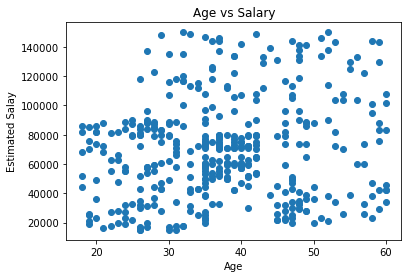

In [5]:
#here we will do EDA(Exploratory Data Analysis)
x = data["Age"]
y = data["EstimatedSalary"]
plt.scatter(x,y)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salay')
plt.show()

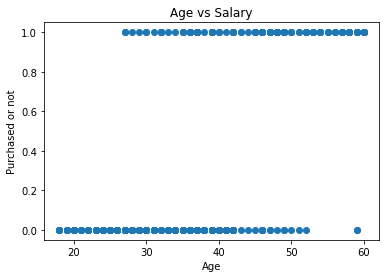

In [6]:
x = data["Age"]
y1 = data["Purchased"]
plt.scatter(x,y1)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Purchased or not')
plt.show()

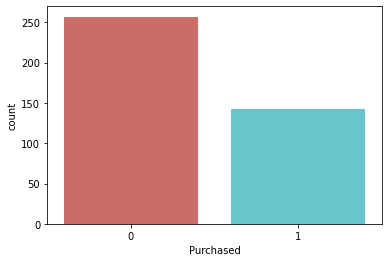

In [7]:
x1 = data["Purchased"]
sns.countplot(x=x1,data=data,palette='hls')
plt.show()

<AxesSubplot:>

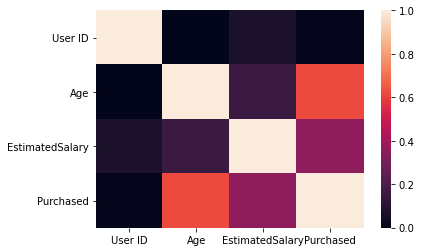

In [8]:
sns.heatmap(data.corr())

In [9]:
#Check the missing value 
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
data['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [11]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
#Replacing Male Female to 0 1 

In [13]:
data=pd.DataFrame(data)
data['Gender'].replace({'Female':0,'Male':1},inplace=True)
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [14]:
# creating Dependent and Independent Variable
x2 = data.iloc[:,[1,2,3]].values
x2


array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [15]:
y2 = data.iloc[:,4].values
y2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [16]:
x2 = pd.DataFrame(x2)


In [18]:
#splitting data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.25, random_state = 0) 

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [23]:
import statsmodels.api as sm
log = sm.Logit(y_train,x_train)
result = log.fit(method='bfgs')
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.431717
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3448
Time:                        13:38:49   Log-Likelihood:                -129.52
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 2.474e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0257      0.154      

In [24]:
#Checking model acurracy using classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [25]:
#Another method to check acurracy
classifier.score(x_test,y_test)#Acurracy Score 

0.9

In [ ]:
""""From this we can conclude that this model is 90% times
    predicting acurrately weather user purchased or not"""
    